# Facial Landmark Detection using OpenCV

Detecting facial landmarks such as the eyes, nose, and mouth is a natural extension to performing face detection since the bounding box for a face represents a natural starting point for detecting facial landmarks. Detecting facial landmarks has numerous applications including drowsy driver detection, emotion detection, virtual makeup, and HCI applications to ease communication for disabled people, to name a few. Facial feature detection is also referred to as “facial landmark detection”, “facial keypoint detection”, and “face alignment” in the literature, and you can use those keywords in Google for finding additional material on the topic. In this notebook, we will be using the OpenCV Facemark API to detect and plot facial landmark points on images. The API generates 68 landmarks as shown below. Facial landmark detection is performed in two steps.

## 1. Face Detection

We will continue to use the same SSD-based face detection model as in previous videos (implemented using the OpenCV DNN module).

`res10_300x300_ssd_iter_140000.caffemodel`

## 2. Facial Landmark Detection

For estimating the location of landmark points, we will use the OpenCV implementation of the paper titled Face Alignment at 3000 FPS via Regressing Local Binary Features by S. Ren et al., published in CVPR 2014.

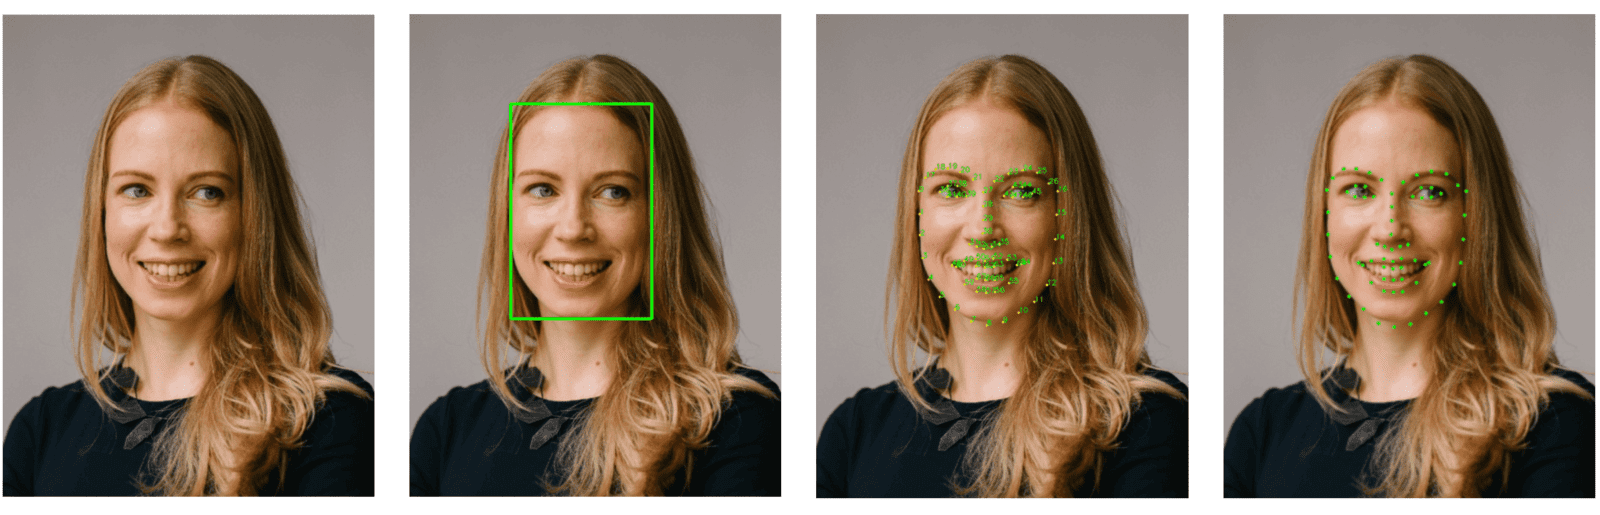

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)
matplotlib.rcParams['image.cmap'] = 'gray'

We are going to be using the OpenCV implementation which uses an algorithm referred to as _local binary features_.

The model generates 68 unique facial landmark points that can be used for numerous types of applications.

## 1. Preview Sample Image

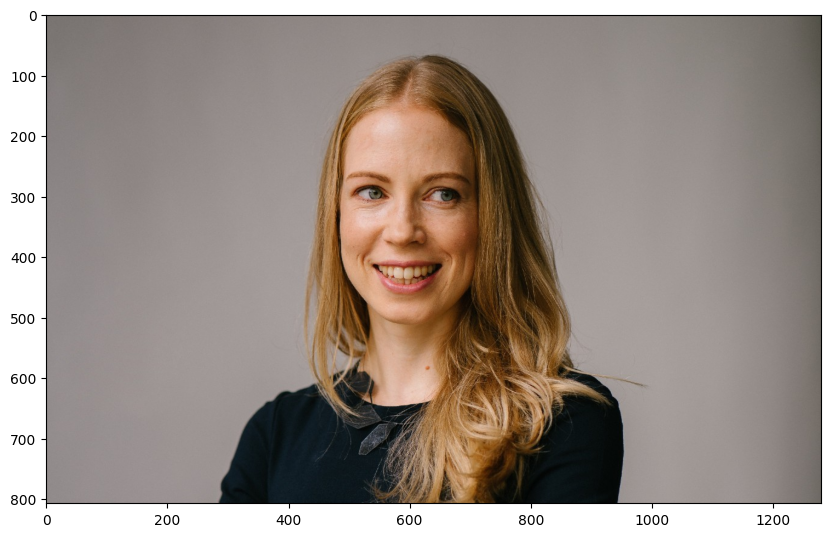

In [34]:
file_name = "./face.jpg"
img = cv2.imread(file_name, cv2.IMREAD_COLOR)
plt.imshow(img[:, :, ::-1]);

## 2. Face Detection
#### Caffe Model: res10_300x300_ssd_iter_140000
### 2.1 Load the Face Detection Model

In [35]:
MODEL_PATH = "/content/res10_300x300_ssd_iter_140000.caffemodel"
CONFIG_PATH = "/content/deploy.prototxt"

# Load the Face Detection Model
net = cv2.dnn.readNetFromCaffe(CONFIG_PATH, MODEL_PATH)

### 2.2 Define a Convenience Function for Face Detection

In [36]:
def detect_faces(image, detection_threshold=0.7):
  # Convert to blob
  blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104, 117, 123])

  # Pass the blob to the DNN
  net.setInput(blob)

  # Retrieve detections from the DNN model
  detections = net.forward()

  # Create a list to store face bounding boxes
  faces = []

  img_h = image.shape[0]
  img_w = image.shape[1]

  # Process the detections
  for detection in detections[0][0]:
    if detection[2] >= detection_threshold:
      left = detection[3] * img_w
      top = detection[4] * img_h
      right = detection[5] * img_w
      bottom = detection[6] * img_h

      face_w = right - left
      face_h = bottom - top

      face_roi = (left, top, face_w, face_h)
      faces.append(face_roi)

  return np.array(faces).astype(int)

### 2.3 Detect Faces

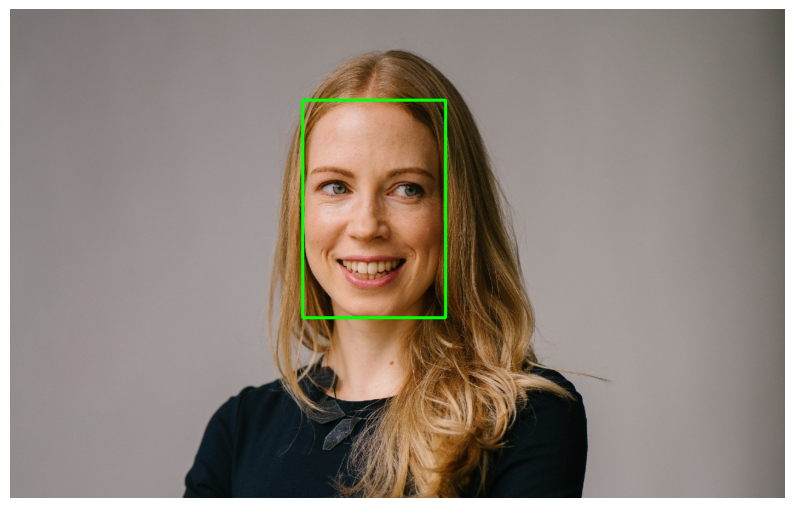

In [37]:
faces = detect_faces(img)
img_display = img.copy()

for face in faces:
  cv2.rectangle(img_display, face, (0, 255, 0), 3)

  plt.imshow(img_display[...,::-1]); plt.axis('off');

## 3. Landmark Detection

Landmark detection involves three basic steps:

+ Create a detector object from the `FacemarkLBF` class
+ Load model using the `loadModel` method
+ Fit landmarks using the `fit` method

We create an instance of `createFacemarkLBF` class that implements the local binary features algorithm for feature detection and load the pre-trained detection model.

### 3.1 Create Landmark Detection Object

In [38]:
# Create the landmark detector instance.
landmark_detector = cv2.face.createFacemarkLBF()

# Load the model
model = "/content/lbfmodel.yaml"
landmark_detector.loadModel(model)

### 3.2 Detect Landmarks

retval, landmarks = cv2.face_Facemark.fit(image, faces)

`landmarks`: The detected ladmarks points for each face.

The function has __2 required arguments__:

`image`: The image with with the faces for the which the landmarks are to be detected

`faces`: The array of faces containing the bounding boxes for each frame

In [39]:
# Detect Landmarks
retval, landmarks_list = landmark_detector.fit(img, faces)

The `landmark_list` returned above is a list of arrays where each array contains the pixel coordinates of the 68 landmark points for each face detected. If multiple faces are detected in an image the `landmark_list` will contain an array of landmark points for each of the faces.

In [40]:
# First index in the list, "landmarksList[:]" refers to a specific array in the list.
print(landmarks_list[0].shape)
print('')
print('                          x   y ')
print('                         -------')

print('First Landmark in list: ', landmarks_list[0][0][0][0].astype(int),  landmarks_list[0][0][0][1].astype(int))
print(' Last Landmark in list: ', landmarks_list[0][0][67][0].astype(int), landmarks_list[0][0][67][1].astype(int))
print('')
print(landmarks_list)

(1, 68, 2)

                          x   y 
                         -------
First Landmark in list:  484 293
 Last Landmark in list:  579 440

(array([[[484.42075, 293.28546],
        [485.50082, 330.28622],
        [486.03458, 366.84067],
        [490.36694, 403.85678],
        [501.33087, 440.2019 ],
        [520.69006, 469.68314],
        [544.63617, 491.47708],
        [569.7113 , 514.6844 ],
        [596.2059 , 520.9227 ],
        [623.193  , 516.3024 ],
        [649.221  , 497.6645 ],
        [674.66345, 479.24106],
        [695.991  , 450.4259 ],
        [707.25104, 414.31247],
        [710.90906, 374.66928],
        [713.28186, 334.6696 ],
        [715.5199 , 295.35287],
        [494.13602, 272.85257],
        [512.2597 , 258.3137 ],
        [533.4167 , 258.09277],
        [554.59595, 264.02136],
        [575.05914, 275.52875],
        [611.3535 , 279.83817],
        [633.74005, 268.12833],
        [658.4533 , 262.02936],
        [683.26227, 266.4058 ],
        [701.9747 , 28

In [41]:
print(type(landmarks_list))
print(np.array(landmarks_list).shape)

<class 'tuple'>
(1, 1, 68, 2)


## 3.3 Display Landmarks with Numbers

68


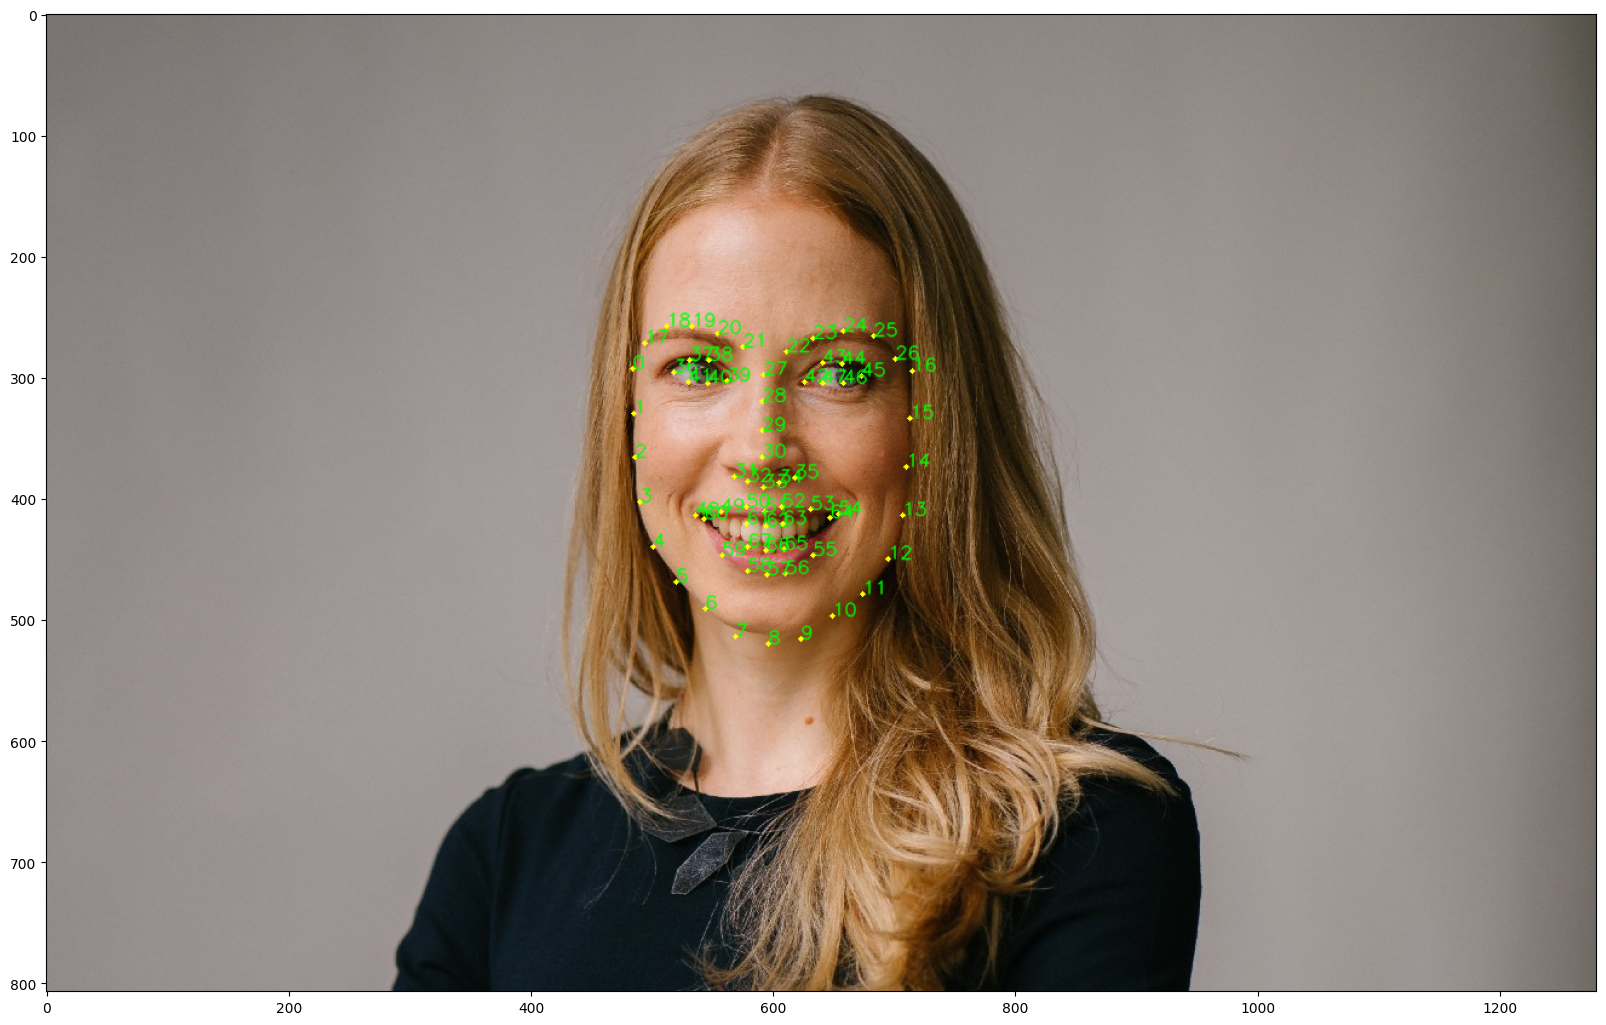

In [42]:
img_display = img.copy()
landmarks = landmarks_list[0][0].astype(int)
print(len(landmarks))
for idx in range(len(landmarks)):
  cv2.circle(img_display, landmarks[idx], 2, [0, 255, 255], -1)
  cv2.putText(img_display, "{}".format(idx), landmarks[idx], cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
plt.figure(figsize=(20, 20))
plt.imshow(img_display[:, :, ::-1]);

In [43]:
print(landmarks_list[0][0][8])

[596.2059 520.9227]


### 3.4 Draw Landmarks Points

The Face Class in OpenCV has a built in function, `drawFacemarks()`, that draws the landmark points.

cv2.face.drawFacemarks(image, points)

The function has __2 required arguments__:

+ `image`: The image onto which the landmark points will be drawn
+ `points`: The list of landmark points

The function has __1 optional argument__:

+ `color`: The RGB color for the landmark points

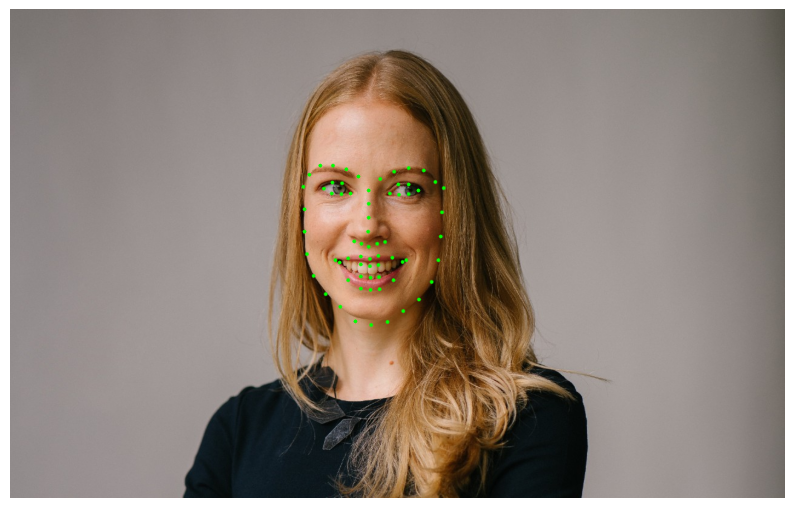

In [44]:
img_display = img.copy()
for landmarks in landmarks_list:
    cv2.face.drawFacemarks(img_display, landmarks, (0, 255, 0))

plt.imshow(img_display[...,::-1]); plt.axis('off');

## 4. Integrated Implementation

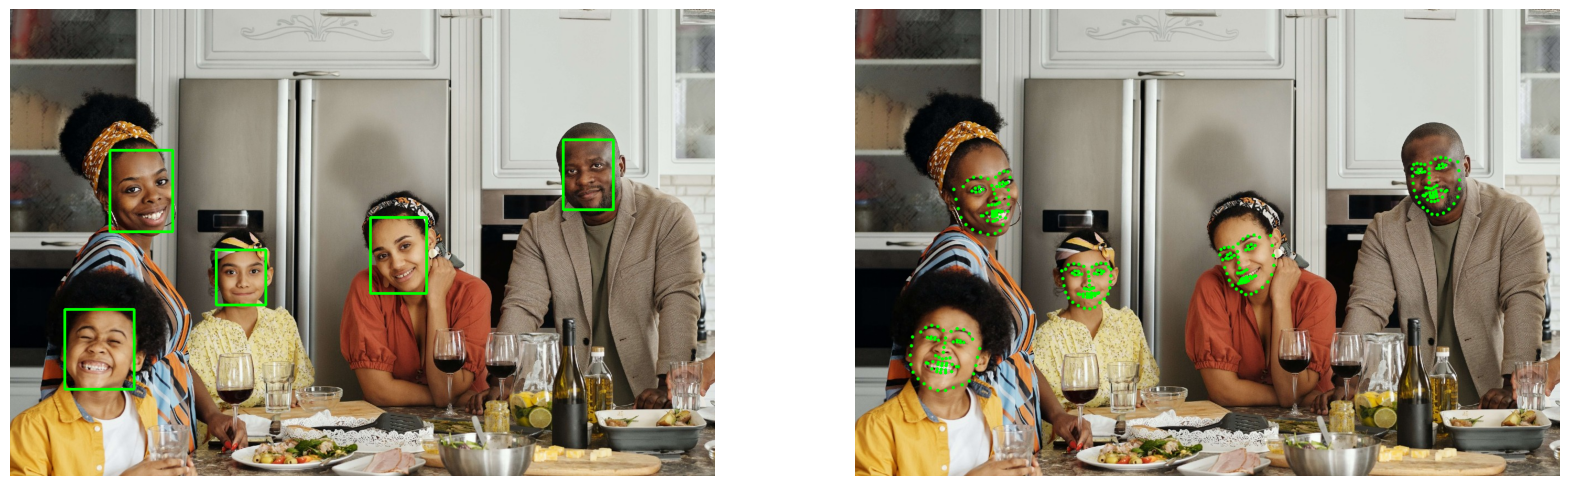

In [46]:
image_filename = "family.jpg"
img = cv2.imread(image_filename, cv2.IMREAD_COLOR)
img_display_faces = img.copy()
img_display_marks = img.copy()

# Detect the faces.
faces = detect_faces(img)

if len(faces) > 0:
  # Render bounding boxes.
  for face in faces:
    cv2.rectangle(img_display_faces, face, (0, 255, 0), 3)

  # Detect the facil lankdmarks.
  retval, landmarks = landmark_detector.fit(img, faces)

  # Render landmark points.
  for lands in landmarks:
    cv2.face.drawFacemarks(img_display_marks, lands, (0, 255, 0))

  fig = plt.figure(figsize=(20, 10))
  plt.subplot(121); plt.imshow(img_display_faces[...,::-1]); plt.axis('off');
  plt.subplot(122); plt.imshow(img_display_marks[...,::-1]); plt.axis('off');

else:
    print('No faces detected in image.')